<a href="https://colab.research.google.com/github/SriramShravya/sales-prediction/blob/main/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics


In [ ]:
#loading the dataset
df = pd.read_csv('/content/salesofcar.csv')
df.head()#first 5cols
df.shape#size of dataset

(23906, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


data cleaning and preprocessing

In [ ]:
# Check for missing values
#print(df.isnull().sum())

# for missing text (categorical values) - take mode (most repeated)
# and for numbers (numerical values) - median (middle value)
# this is called imputation

# Fill missing numerical values with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Check if all missing values are handled
df.isnull().sum()


,0
Car_id,0
Date,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [ ]:
print(df.columns.tolist())

['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region']


removing unwanted data


In [ ]:
df.drop(columns=['Car_id', 'Phone', 'Dealer_No '], inplace=True)


In [ ]:
df.head()

,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Customer Name  23906 non-null  object
 2   Gender         23906 non-null  object
 3   Annual Income  23906 non-null  int64 
 4   Dealer_Name    23906 non-null  object
 5   Company        23906 non-null  object
 6   Model          23906 non-null  object
 7   Engine         23906 non-null  object
 8   Transmission   23906 non-null  object
 9   Color          23906 non-null  object
 10  Price ($)      23906 non-null  int64 
 11  Body Style     23906 non-null  object
 12  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.4+ MB


In [ ]:
sns.set()

<ipython-input-13-5e85b7c5b142>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income'])


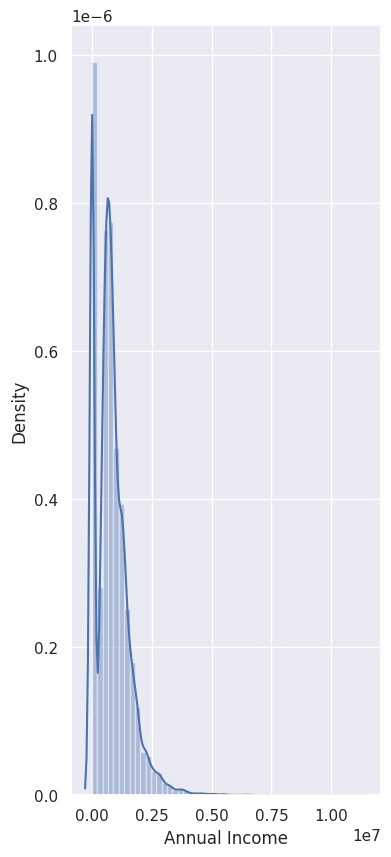

In [ ]:
#Annual Income
#distribution plot
plt.figure(figsize=(4,10))
sns.distplot(df['Annual Income'])
plt.show()

<ipython-input-14-89f0af5b8bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price ($)'])


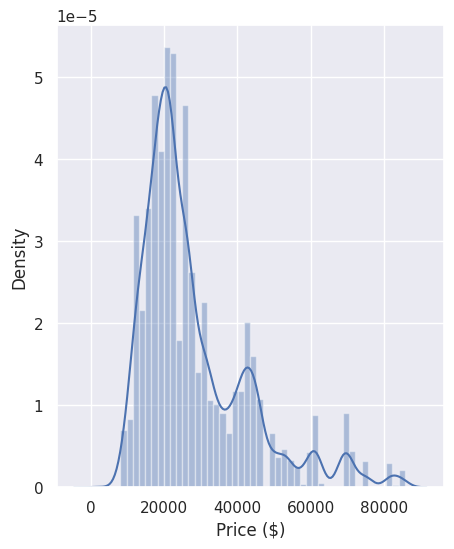

In [ ]:
#price
#distribution plot
plt.figure(figsize=(5,6))
sns.distplot(df['Price ($)'])
plt.show()

more products in range of 20000

categorical features

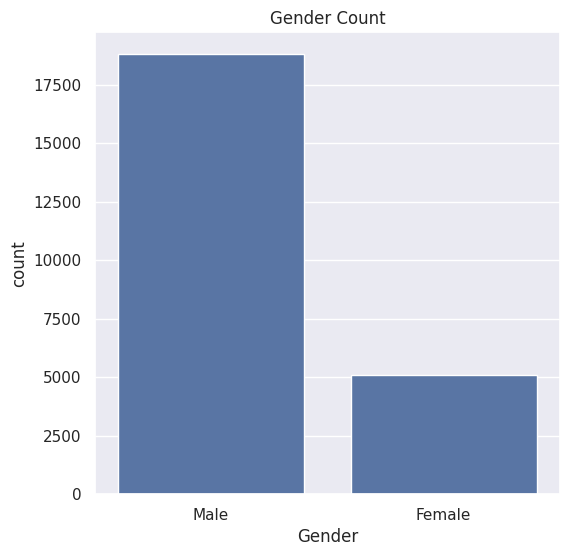

In [ ]:
#Gender
#countplot
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=df)
plt.title("Gender Count")
plt.show()

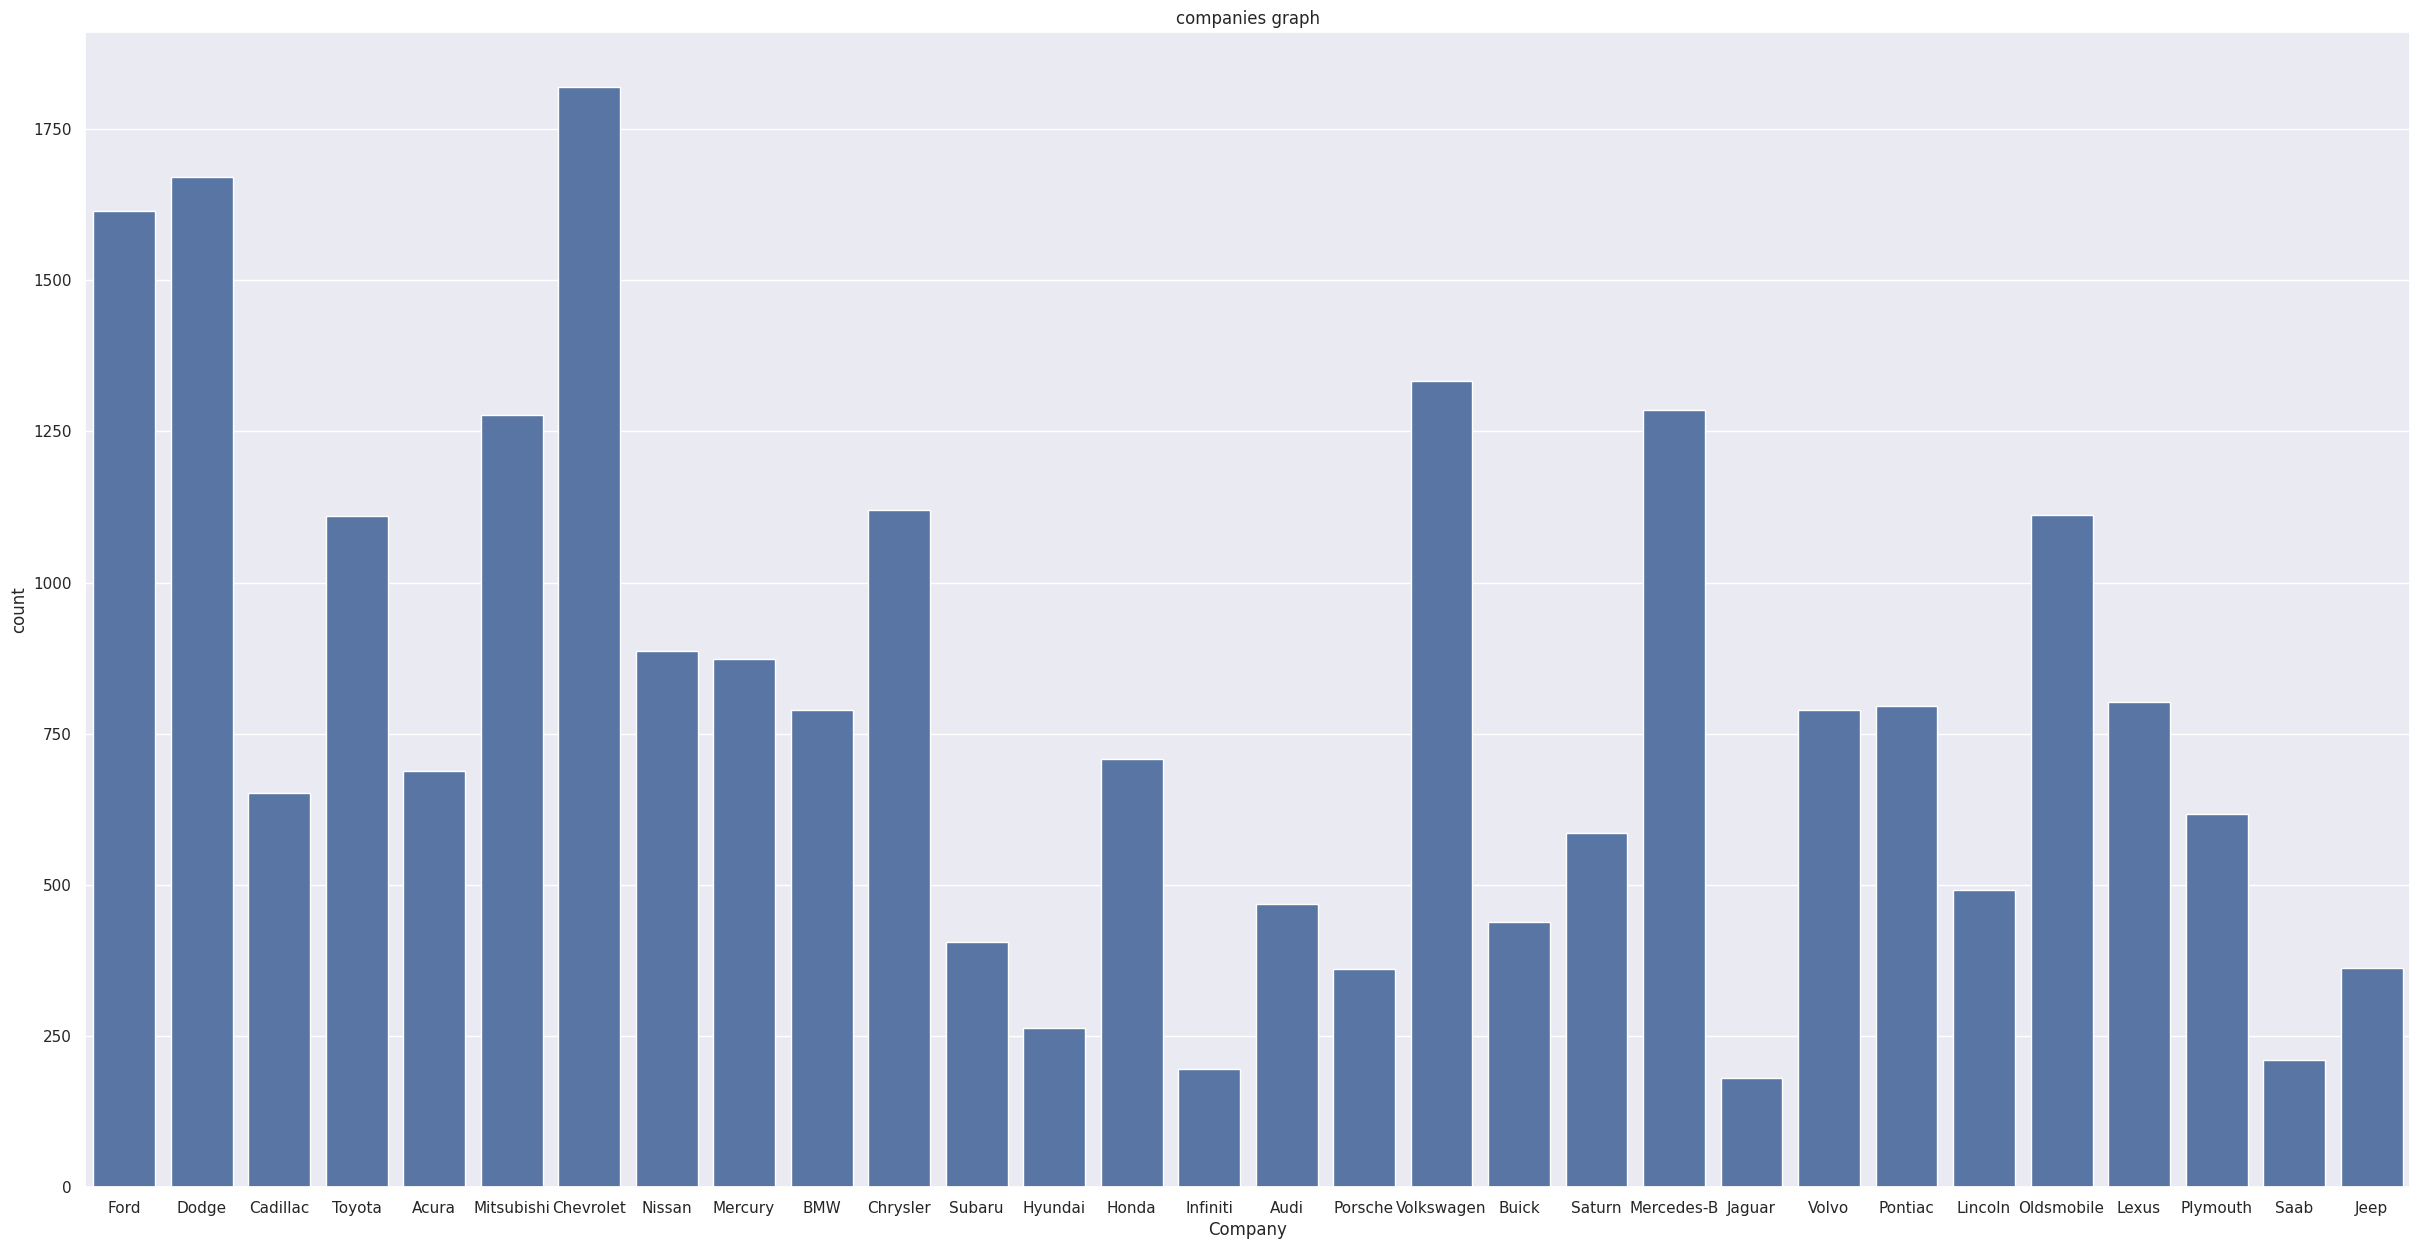

In [ ]:
#company
plt.figure(figsize=(30,15))
sns.countplot(x='Company', data=df)
plt.title("companies graph")
plt.show()

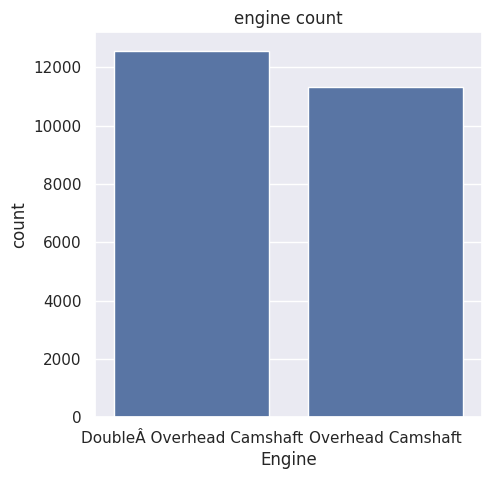

In [ ]:
#Engine
plt.figure(figsize=(5,5))
sns.countplot(x='Engine',data=df)
plt.title("engine count")
plt.show()

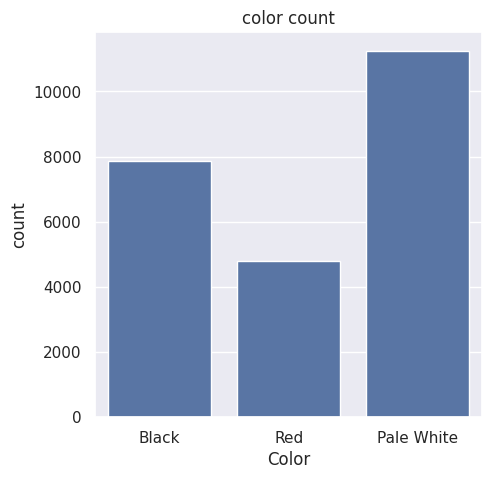

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Color',data=df)
plt.title("color count")
plt.show()

<ipython-input-19-b7caa0229950>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_dealers.index, y=top_10_dealers.values, palette='viridis')


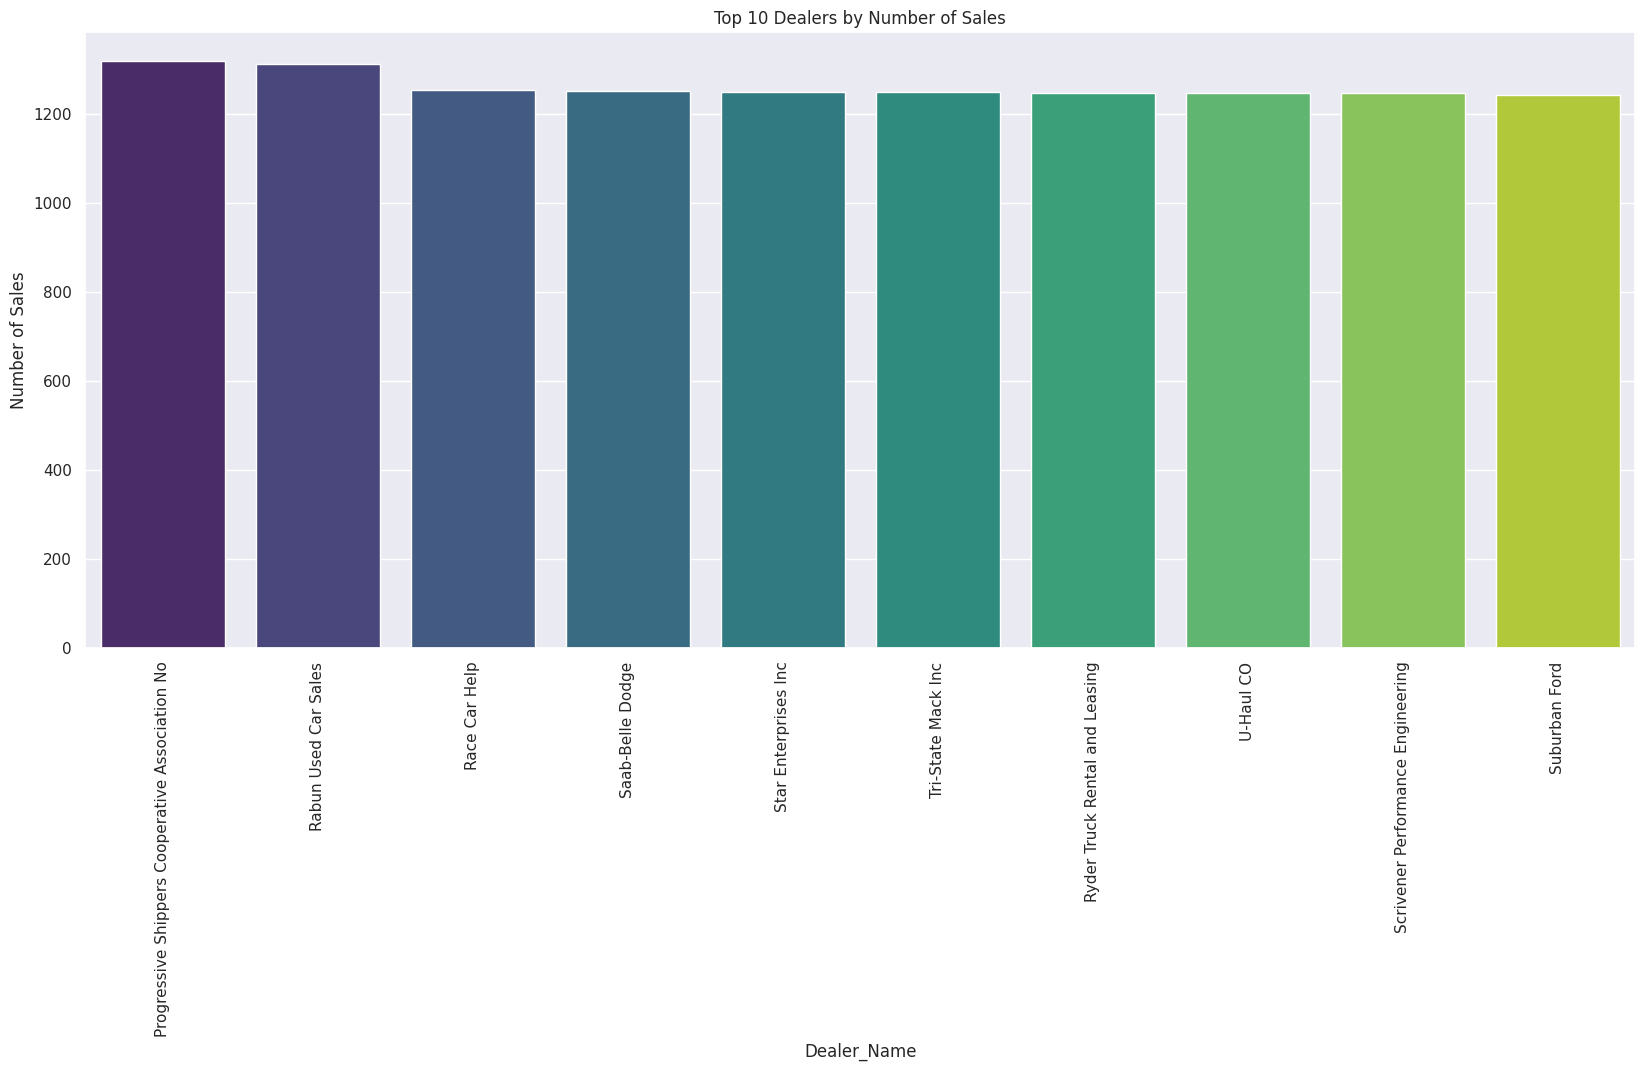

<ipython-input-19-b7caa0229950>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_10_dealers.index, y=least_10_dealers.values, palette='magma')


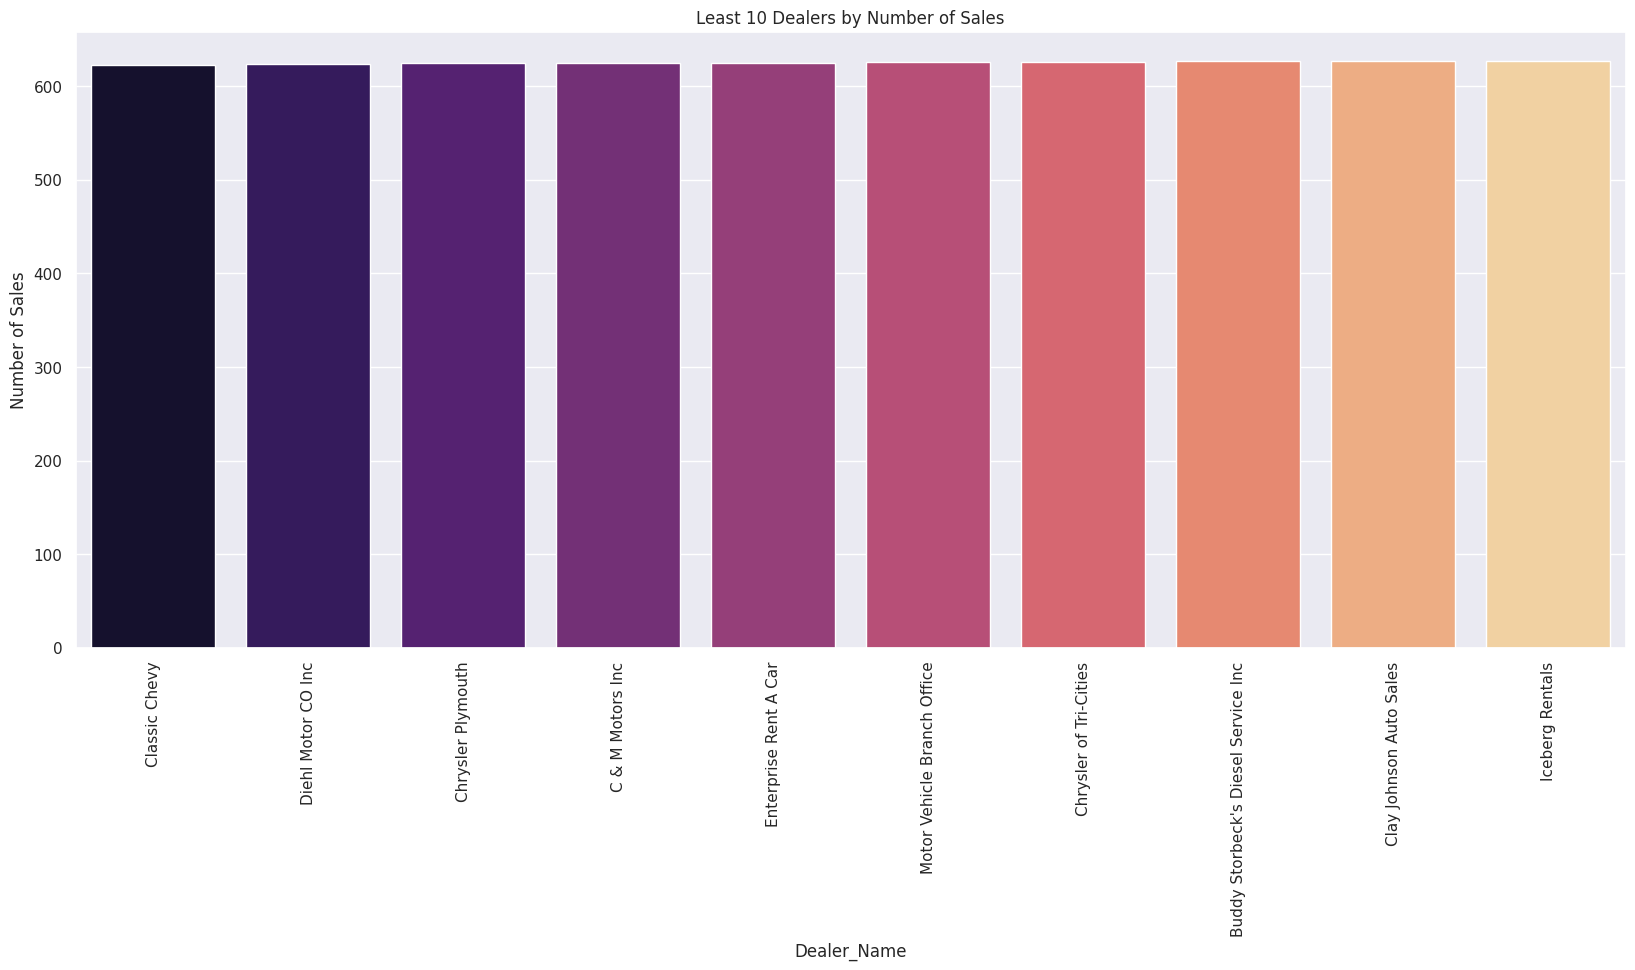

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sales per dealer
dealer_counts = df['Dealer_Name'].value_counts()

# Get top 10 dealers by sales count
top_10_dealers = dealer_counts.head(10)

# Get least 10 dealers by sales count
least_10_dealers = dealer_counts.sort_values().head(10)

# Plot top 10 dealers
plt.figure(figsize=(20, 8))
sns.barplot(x=top_10_dealers.index, y=top_10_dealers.values, palette='viridis')
plt.title("Top 10 Dealers by Number of Sales")
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.show()

# Plot least 10 dealers
plt.figure(figsize=(20, 8))
sns.barplot(x=least_10_dealers.index, y=least_10_dealers.values, palette='magma')
plt.title("Least 10 Dealers by Number of Sales")
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df.head()

,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Customer Name  23906 non-null  object
 2   Gender         23906 non-null  object
 3   Annual Income  23906 non-null  int64 
 4   Dealer_Name    23906 non-null  object
 5   Company        23906 non-null  object
 6   Model          23906 non-null  object
 7   Engine         23906 non-null  object
 8   Transmission   23906 non-null  object
 9   Color          23906 non-null  object
 10  Price ($)      23906 non-null  int64 
 11  Body Style     23906 non-null  object
 12  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.4+ MB


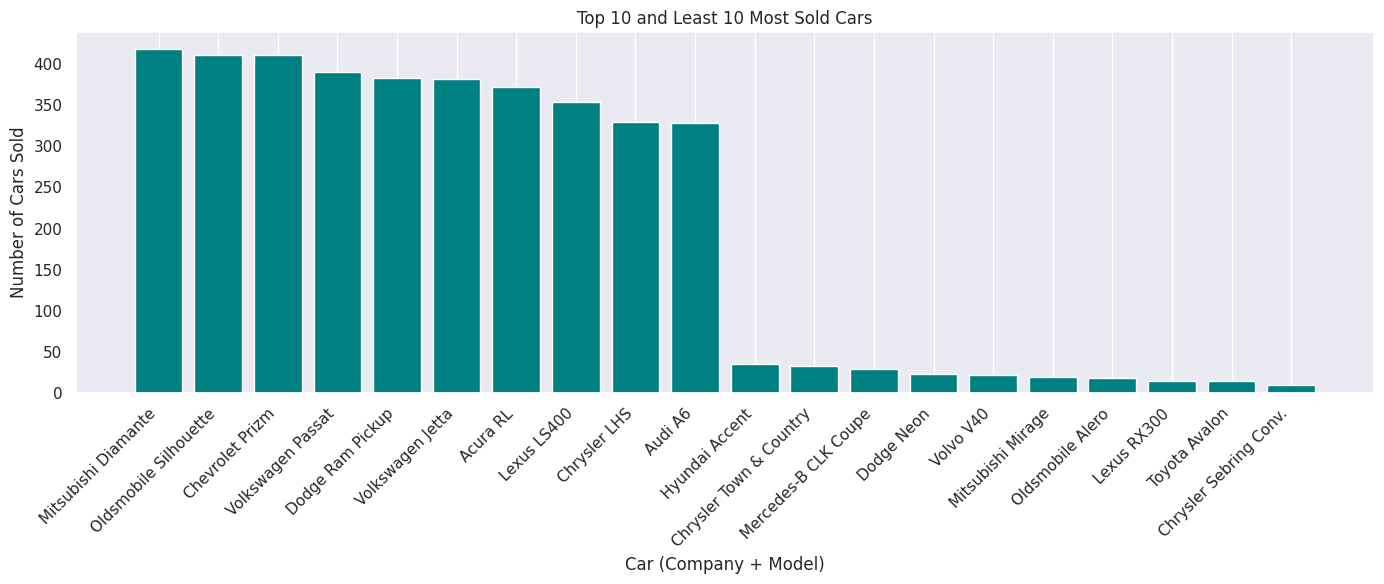

In [ ]:
# groupby is used to group rows based on one or more columns and apply an aggregate function (like count, sum, mean, etc.)


# Group by Company and Model to count number of sales per car
#car_sales is dataframe in python
car_sales = df.groupby(['Company', 'Model']).size().reset_index(name='Sales Count')

# Combine Company and Model into one column
car_sales['Car'] = car_sales['Company'] + ' ' + car_sales['Model']

# Sort by sales count
car_sales = car_sales.sort_values(by='Sales Count', ascending=False)

# Get Top 10 and Bottom 10
top_10 = car_sales.head(10)
bottom_10 = car_sales.tail(10)

# Combine them for plotting
combined = pd.concat([top_10, bottom_10])

# Plot the combined graph
plt.figure(figsize=(14, 6))
plt.bar(combined['Car'], combined['Sales Count'], color='teal')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Car (Company + Model)')
plt.ylabel('Number of Cars Sold')
plt.title('Top 10 and Least 10 Most Sold Cars')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd

# Convert 'Date' column to datetime format, let pandas infer format automatically
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' conversion failed (if any)
df = df.dropna(subset=['Date'])

# Extract Month and Year from the datetime 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Check result
print(df[['Date', 'Month', 'Year']].head())


        Date  Month  Year
0 2022-01-02      1  2022
1 2022-01-02      1  2022
2 2022-01-02      1  2022
3 2022-01-02      1  2022
4 2022-01-02      1  2022


In [ ]:
df.head()


,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Month,Year
0,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,1,2022
1,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,1,2022
2,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,1,2022
3,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,1,2022
4,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,1,2022


In [ ]:
print(df.iloc[2000])



Date                   2022-04-26 00:00:00
Customer Name                         Adam
Gender                                Male
Annual Income                      1180000
Dealer_Name        Clay Johnson Auto Sales
Company                         Volkswagen
Model                               Passat
Engine           DoubleÂ Overhead Camshaft
Transmission                          Auto
Color                                  Red
Price ($)                            13000
Body Style                       Hatchback
Dealer_Region                       Austin
Month                                    4
Year                                  2022
Name: 2000, dtype: object


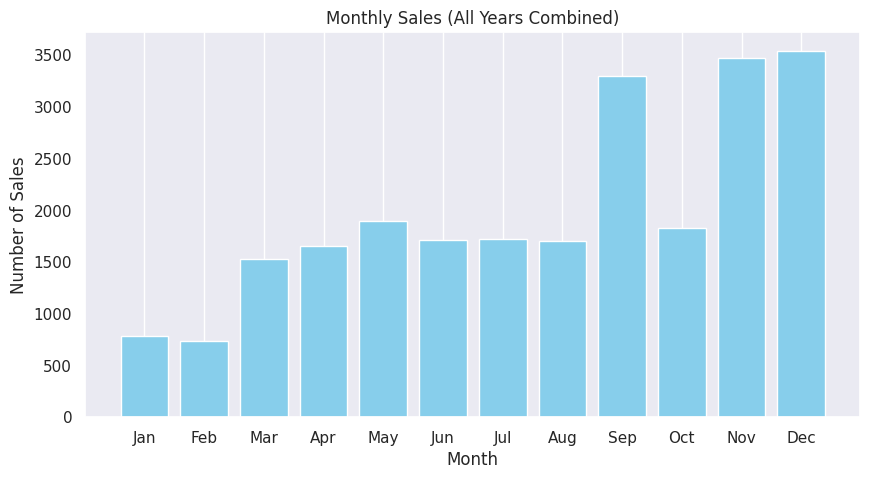

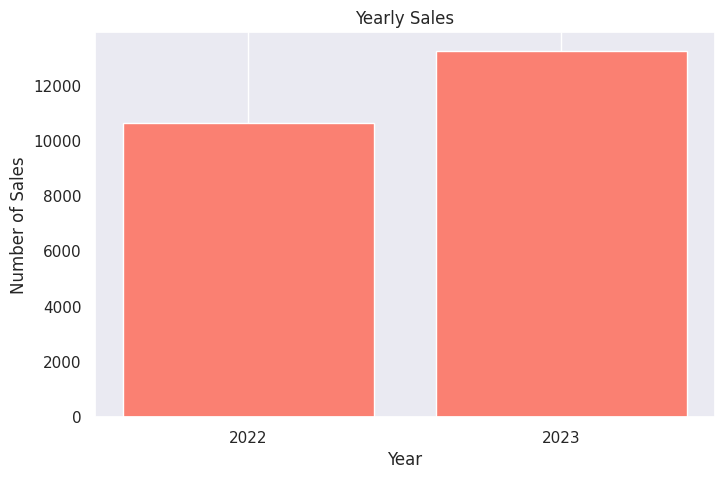

In [ ]:
import matplotlib.pyplot as plt

# Monthly Sales (all years combined)
monthly_sales = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(monthly_sales.index, monthly_sales.values, color='skyblue')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Monthly Sales (All Years Combined)')
plt.grid(axis='y')
plt.show()

# Yearly Sales
yearly_sales = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(yearly_sales.index.astype(str), yearly_sales.values, color='salmon')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.title('Yearly Sales')
plt.grid(axis='y')
plt.show()


<ipython-input-27-e2625de5f6aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dealers.index, y=top_dealers.values, palette='viridis')


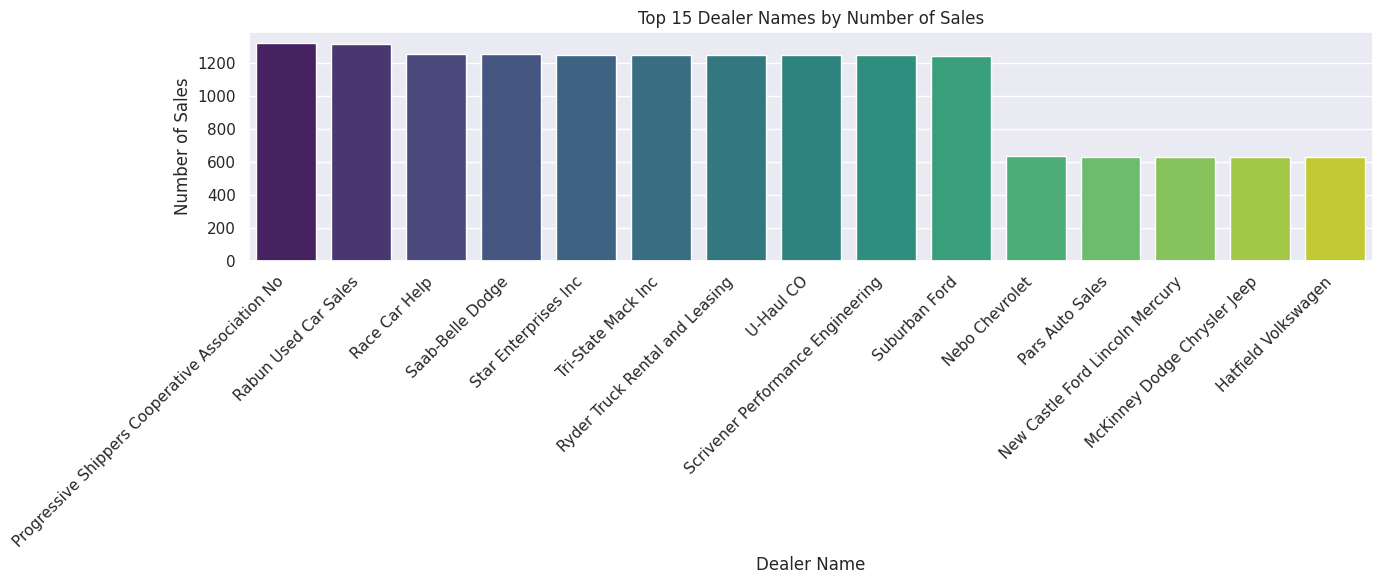

<ipython-input-27-e2625de5f6aa>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')


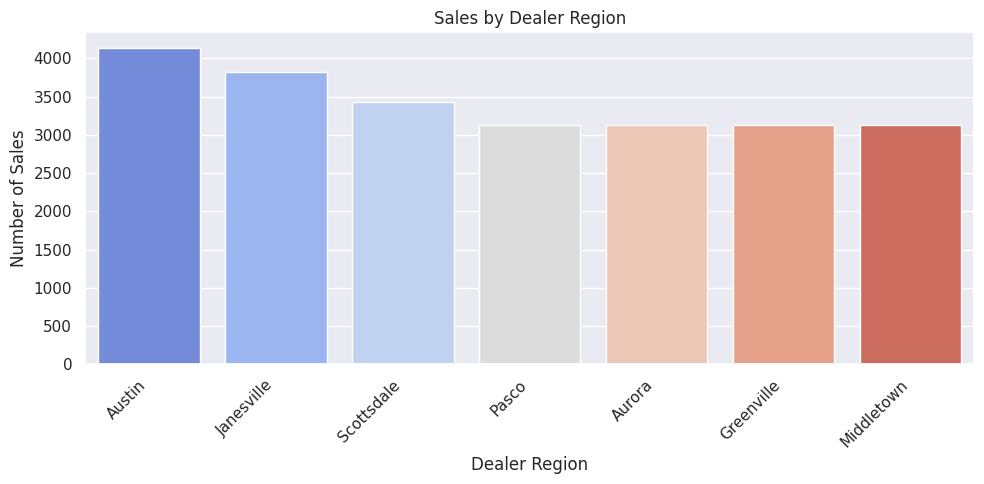

In [ ]:

# Plot for Dealer_Name (top 15 for readability)
plt.figure(figsize=(14, 6))
top_dealers = df['Dealer_Name'].value_counts().head(15)
sns.barplot(x=top_dealers.index, y=top_dealers.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Dealer Name')
plt.ylabel('Number of Sales')
plt.title('Top 15 Dealer Names by Number of Sales')
plt.tight_layout()
plt.show()

# Plot for Dealer_Region
plt.figure(figsize=(10, 5))
region_counts = df['Dealer_Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Sales')
plt.title('Sales by Dealer Region')
plt.tight_layout()
plt.show()


label encoding

In [ ]:
#unique values to find nominal or ordinal data and which label encoding method is suitable
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Unique Values: {unique_vals[:10]}{' ...' if len(unique_vals) > 10 else ''}")
    print("-" * 50)


Column: Date
Number of Unique Values: 612
Unique Values: <DatetimeArray>
['2022-01-02 00:00:00', '2022-01-03 00:00:00', '2022-01-04 00:00:00',
 '2022-01-05 00:00:00', '2022-01-06 00:00:00', '2022-01-09 00:00:00',
 '2022-01-10 00:00:00', '2022-01-12 00:00:00', '2022-01-13 00:00:00',
 '2022-01-17 00:00:00']
Length: 10, dtype: datetime64[ns] ...
--------------------------------------------------
Column: Customer Name
Number of Unique Values: 3021
Unique Values: ['Geraldine' 'Gia' 'Gianna' 'Giselle' 'Grace' 'Guadalupe' 'Hailey'
 'Graham' 'Naomi' 'Grayson'] ...
--------------------------------------------------
Column: Gender
Number of Unique Values: 2
Unique Values: ['Male' 'Female']
--------------------------------------------------
Column: Annual Income
Number of Unique Values: 2508
Unique Values: [  13500 1480000 1035000 1465000  850000 1600000  815000  885000  722000
  746000] ...
--------------------------------------------------
Column: Dealer_Name
Number of Unique Values: 28
Unique 

In [ ]:
df.drop(columns=['Customer Name','Date'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         23906 non-null  object
 1   Annual Income  23906 non-null  int64 
 2   Dealer_Name    23906 non-null  object
 3   Company        23906 non-null  object
 4   Model          23906 non-null  object
 5   Engine         23906 non-null  object
 6   Transmission   23906 non-null  object
 7   Color          23906 non-null  object
 8   Price ($)      23906 non-null  int64 
 9   Body Style     23906 non-null  object
 10  Dealer_Region  23906 non-null  object
 11  Month          23906 non-null  int32 
 12  Year           23906 non-null  int32 
dtypes: int32(2), int64(2), object(9)
memory usage: 2.2+ MB


label encoding

1. Gender           : Label Encoding
2. Annual Income    : None (Numeric)-no need
3. Dealer\_Name      : Label Encoding
4. Company          : Label Encoding
5. Model            : Frequency Encoding
6. Engine           : Label Encoding
7. Transmission     : Label Encoding
8. Color            : One-Hot Encoding
9. Price (\$)        : None (Numeric) no need
10. Body Style      : One-Hot Encoding
11. Dealer\_Region   : One-Hot Encoding
12. Month           : Cyclic Encoding
13. Year            : None (Numeric) or Label Encoding


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         23906 non-null  object
 1   Annual Income  23906 non-null  int64 
 2   Dealer_Name    23906 non-null  object
 3   Company        23906 non-null  object
 4   Model          23906 non-null  object
 5   Engine         23906 non-null  object
 6   Transmission   23906 non-null  object
 7   Color          23906 non-null  object
 8   Price ($)      23906 non-null  int64 
 9   Body Style     23906 non-null  object
 10  Dealer_Region  23906 non-null  object
 11  Month          23906 non-null  int32 
 12  Year           23906 non-null  int32 
dtypes: int32(2), int64(2), object(9)
memory usage: 2.2+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming your DataFrame is named df

# Store LabelEncoders for later use if needed
label_encoders = {}

# Store one-hot encoded column info for reversibility
one_hot_columns = {}

# 1. Gender - Label Encoding
le_gender = LabelEncoder()
df['Gender_encoded'] = le_gender.fit_transform(df['Gender'])
label_encoders['Gender'] = le_gender

# 2. Annual Income - Numeric, no encoding (optional scaling not shown)

# 3. Dealer_Name - Label Encoding (reversible)
le_dealer_name = LabelEncoder()
df['Dealer_Name_encoded'] = le_dealer_name.fit_transform(df['Dealer_Name'])
label_encoders['Dealer_Name'] = le_dealer_name

# 4. Company - Label Encoding
le_company = LabelEncoder()
df['Company_encoded'] = le_company.fit_transform(df['Company'])
label_encoders['Company'] = le_company

# 5. Model - Label Encoding (reversible, changed from frequency encoding)
le_model = LabelEncoder()
df['Model_encoded'] = le_model.fit_transform(df['Model'])
label_encoders['Model'] = le_model

# 6. Engine - Label Encoding
le_engine = LabelEncoder()
df['Engine_encoded'] = le_engine.fit_transform(df['Engine'])
label_encoders['Engine'] = le_engine

# 7. Transmission - Label Encoding
le_transmission = LabelEncoder()
df['Transmission_encoded'] = le_transmission.fit_transform(df['Transmission'])
label_encoders['Transmission'] = le_transmission

# 8. Color - One-Hot Encoding
color_dummies = pd.get_dummies(df['Color'], prefix='Color')
df = pd.concat([df, color_dummies], axis=1)
one_hot_columns['Color'] = color_dummies.columns.tolist()
df.drop('Color', axis=1, inplace=True)

# 9. Price ($) - Numeric, no encoding (optional scaling not shown)

# 10. Body Style - One-Hot Encoding
body_style_dummies = pd.get_dummies(df['Body Style'], prefix='BodyStyle')
df = pd.concat([df, body_style_dummies], axis=1)
one_hot_columns['Body Style'] = body_style_dummies.columns.tolist()
df.drop('Body Style', axis=1, inplace=True)

# 13. Dealer_Region - One-Hot Encoding
dealer_region_dummies = pd.get_dummies(df['Dealer_Region'], prefix='DealerRegion')
df = pd.concat([df, dealer_region_dummies], axis=1)
one_hot_columns['Dealer_Region'] = dealer_region_dummies.columns.tolist()
df.drop('Dealer_Region', axis=1, inplace=True)

# Now df contains encoded features
# You can use label_encoders dict to inverse transform Label Encoded columns
# one_hot_columns dict stores columns created for each one-hot encoded original column for reversibility

# Example to inverse transform a label encoded column:
# original_gender = label_encoders['Gender'].inverse_transform(df['Gender_encoded'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   23906 non-null  object
 1   Annual Income            23906 non-null  int64 
 2   Dealer_Name              23906 non-null  object
 3   Company                  23906 non-null  object
 4   Model                    23906 non-null  object
 5   Engine                   23906 non-null  object
 6   Transmission             23906 non-null  object
 7   Price ($)                23906 non-null  int64 
 8   Month                    23906 non-null  int32 
 9   Year                     23906 non-null  int32 
 10  Gender_encoded           23906 non-null  int64 
 11  Dealer_Name_encoded      23906 non-null  int64 
 12  Company_encoded          23906 non-null  int64 
 13  Model_encoded            23906 non-null  int64 
 14  Engine_encoded           23906 non-nul

creating the target variable

In [ ]:
group_keys = ['Year', 'Month', 'Model_encoded']

# 3. Create Target Variable (Sales)
sales_counts = (
    df.groupby(group_keys)
      .size()
      .reset_index(name='Sales')  # Target variable
)

# 4. Aggregate Continuous Features
cont_agg = (
    df.groupby(group_keys)
      .agg({
         'Price ($)': 'mean',
         'Annual Income': 'mean'
      })
      .rename(columns={
         'Price ($)': 'Avg_Price',
         'Annual Income': 'Avg_Annual_Income'
      })
      .reset_index()
)

# 5. Aggregate Categorical Encoded Features by Mode
cat_cols = ['Gender_encoded', 'Company_encoded', 'Engine_encoded',
            'Transmission_encoded', 'Dealer_Name_encoded']
cat_agg = (
    df.groupby(group_keys)[cat_cols]
      .agg(lambda s: s.mode()[0])
      .reset_index()
)

# 6. Aggregate One-Hot Encoded Boolean Columns (Color, Body Style, Region)
bool_cols = [col for col in df.columns if df[col].dtype == 'bool']
bool_agg = (
    df.groupby(group_keys)[bool_cols]
      .max()
      .reset_index()
)

# 7. Merge All Aggregations into One Dataset
sales_data = (
    sales_counts
    .merge(cont_agg, on=group_keys)
    .merge(cat_agg, on=group_keys)
    .merge(bool_agg, on=group_keys)
)


In [ ]:
print("Sales Count:\n", sales_counts.head())
print("\nSales Data:\n", sales_data.head())


Sales Count:
    Year  Month  Model_encoded  Sales
0  2022      1              1      2
1  2022      1              2      3
2  2022      1              3      3
3  2022      1              4      3
4  2022      1              5      1

Sales Data:
    Year  Month  Model_encoded  Sales     Avg_Price  Avg_Annual_Income  \
0  2022      1              1      2  29500.000000       1.170000e+06   
1  2022      1              2      3  21333.333333       7.256667e+05   
2  2022      1              3      3  17167.000000       8.461667e+05   
3  2022      1              4      3  18334.000000       6.511667e+05   
4  2022      1              5      1  25000.000000       1.350000e+04   

   Gender_encoded  Company_encoded  Engine_encoded  Transmission_encoded  ...  \
0               1               18               0                     0  ...   
1               1                6               0                     0  ...   
2               1                2               0                  

In [ ]:
print(df.columns.tolist())


['Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Price ($)', 'Month', 'Year', 'Gender_encoded', 'Dealer_Name_encoded', 'Company_encoded', 'Model_encoded', 'Engine_encoded', 'Transmission_encoded', 'Color_Black', 'Color_Pale White', 'Color_Red', 'BodyStyle_Hardtop', 'BodyStyle_Hatchback', 'BodyStyle_Passenger', 'BodyStyle_SUV', 'BodyStyle_Sedan', 'DealerRegion_Aurora', 'DealerRegion_Austin', 'DealerRegion_Greenville', 'DealerRegion_Janesville', 'DealerRegion_Middletown', 'DealerRegion_Pasco', 'DealerRegion_Scottsdale']


 Year  Month  Model_encoded  Sales

 2022     1         1           2   ← Model 1 sold 2 units in Jan 2022

 2022     1         2           3   ← Model 2 sold 3 units in Jan 2022

 ...


Machine learning XGBOOST

📉 RMSE on test set: 2.4885

🔍 Actual vs Predicted Sales (sample):
   Actual  Predicted
0      19  15.292376
1       4   4.762761
2       4   4.244567
3       3   3.022532
4       7  11.501077
5       2   2.224995
6       1   1.726424
7       3   3.352974
8       7   7.838454
9       9   5.847538


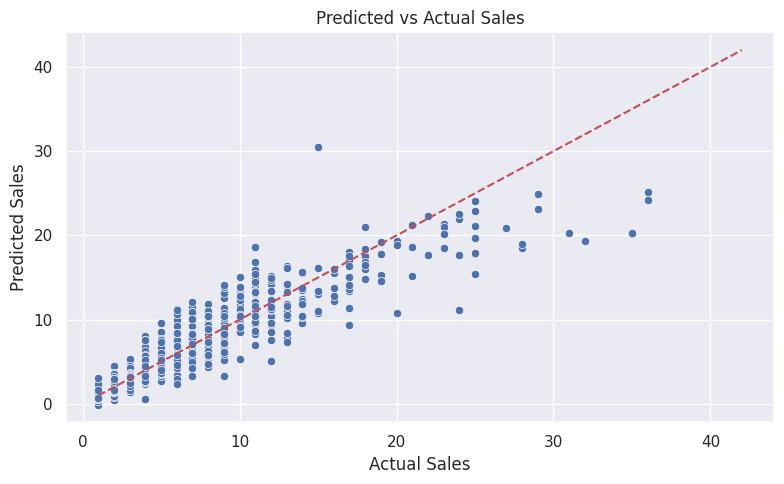

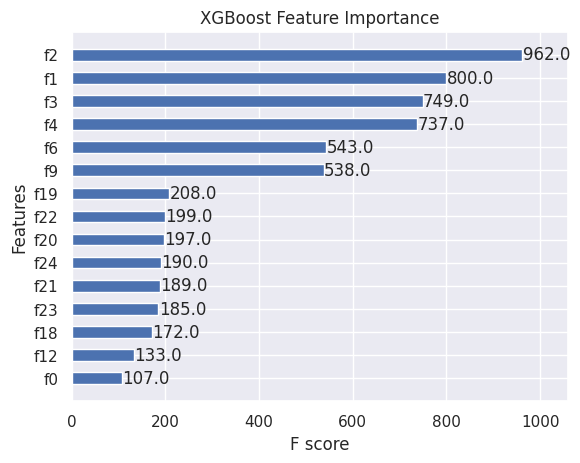

In [ ]:
'''import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sales_data' is your preprocessed DataFrame with features and 'Sales' target

# Separate features and target
X = sales_data.drop(columns=['Sales'])
y = sales_data['Sales']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define model parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 6,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"📉 RMSE on test set: {rmse:.2f}")

# -------------------------------
# Visualization & Insights
# -------------------------------

# 1. Predicted vs Actual sales scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Feature Importance plot
xgb.plot_importance(model, max_num_features=15, height=0.5)
plt.title("XGBoost Feature Importance")
plt.show()

print("actual values:",y_test.values)
print("predicted values:",y_pred)'''
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Split features and target
X = sales_data.drop(columns=['Sales'])
y = sales_data['Sales']

# Optional: Feature Scaling (especially for features with large range differences)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost Parameters (tuned)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.05,           # Lower learning rate
    'max_depth': 4,        # Slightly shallower trees
    'subsample': 0.8,      # Use subset of rows
    'colsample_bytree': 0.8, # Use subset of columns
    'lambda': 1.0,         # L2 regularization
    'alpha': 0.5,          # L1 regularization
    'seed': 42
}

# Training with early stopping
evals = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals,
                  early_stopping_rounds=30, verbose_eval=False)

# Predictions
y_pred = model.predict(dtest)

# RMSE Calculation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"📉 RMSE on test set: {rmse:.4f}")

# Compare Actual vs Predicted
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print("\n🔍 Actual vs Predicted Sales (sample):")
print(comparison_df.head(10))

# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance
xgb.plot_importance(model, max_num_features=15, height=0.5)
plt.title("XGBoost Feature Importance")
plt.show()




"My XGBoost model can estimate how many cars of a particular model will be sold in a given month and year. On average, it's off by about 2 to 3 cars in its prediction for each model-month."

model thinks model_encoded and month,avvg price as the most useful for prediction

****Testing****

In [ ]:
import pandas as pd
import xgboost as xgb

new_data_dict = {
    'Year': [2023],
    'Month': [5],
    'Model_encoded': [3],
    'Avg_Price': [18000.0],               # renamed here
    'Avg_Annual_Income': [750000],       # renamed here
    'Gender_encoded': [1],
    'Company_encoded': [2],
    'Engine_encoded': [0],
    'Transmission_encoded': [1],
    'Dealer_Name_encoded': [5],
    'Color_Black': [False],
    'Color_Pale White': [False],
    'Color_Red': [False],
    'BodyStyle_Hardtop': [False],
    'BodyStyle_Hatchback': [False],
    'BodyStyle_Passenger': [False],
    'BodyStyle_SUV': [True],
    'BodyStyle_Sedan': [False],
    'DealerRegion_Aurora': [False],
    'DealerRegion_Austin': [True],
    'DealerRegion_Greenville': [False],
    'DealerRegion_Janesville': [False],
    'DealerRegion_Middletown': [False],
    'DealerRegion_Pasco': [False],
    'DealerRegion_Scottsdale': [False]
}

new_data = pd.DataFrame(new_data_dict)

# Make sure order of columns matches training data columns
expected_columns = [
    'Year', 'Month', 'Model_encoded', 'Avg_Price', 'Avg_Annual_Income',
    'Gender_encoded', 'Company_encoded', 'Engine_encoded', 'Transmission_encoded', 'Dealer_Name_encoded',
    'Color_Black', 'Color_Pale White', 'Color_Red',
    'BodyStyle_Hardtop', 'BodyStyle_Hatchback', 'BodyStyle_Passenger', 'BodyStyle_SUV', 'BodyStyle_Sedan',
    'DealerRegion_Aurora', 'DealerRegion_Austin', 'DealerRegion_Greenville', 'DealerRegion_Janesville',
    'DealerRegion_Middletown', 'DealerRegion_Pasco', 'DealerRegion_Scottsdale'
]

new_data = new_data[expected_columns]

dnew = xgb.DMatrix(new_data)

predicted_sales = model.predict(dnew)

print(f"Predicted Sales: {predicted_sales[0]:.2f}")


Predicted Sales: 2.53


the owner might sell 2 to 3 cars in may 2023 and the car model is camry

In [ ]:
import pandas as pd
import xgboost as xgb

new_data_dict = {
    'Year': [2023],
    'Month': [8],                    # Changed month to August
    'Model_encoded': [5],            # Different car model
    'Avg_Price': [22000.0],          # Different price
    'Avg_Annual_Income': [820000],  # Slightly different income
    'Gender_encoded': [1],
    'Company_encoded': [4],          # Different company
    'Engine_encoded': [1],
    'Transmission_encoded': [0],
    'Dealer_Name_encoded': [7],
    'Color_Black': [True],
    'Color_Pale White': [False],
    'Color_Red': [False],
    'BodyStyle_Hardtop': [False],
    'BodyStyle_Hatchback': [True],
    'BodyStyle_Passenger': [False],
    'BodyStyle_SUV': [False],
    'BodyStyle_Sedan': [False],
    'DealerRegion_Aurora': [True],
    'DealerRegion_Austin': [False],
    'DealerRegion_Greenville': [False],
    'DealerRegion_Janesville': [False],
    'DealerRegion_Middletown': [False],
    'DealerRegion_Pasco': [False],
    'DealerRegion_Scottsdale': [False]
}

new_data = pd.DataFrame(new_data_dict)

expected_columns = [
    'Year', 'Month', 'Model_encoded', 'Avg_Price', 'Avg_Annual_Income',
    'Gender_encoded', 'Company_encoded', 'Engine_encoded', 'Transmission_encoded', 'Dealer_Name_encoded',
    'Color_Black', 'Color_Pale White', 'Color_Red',
    'BodyStyle_Hardtop', 'BodyStyle_Hatchback', 'BodyStyle_Passenger', 'BodyStyle_SUV', 'BodyStyle_Sedan',
    'DealerRegion_Aurora', 'DealerRegion_Austin', 'DealerRegion_Greenville', 'DealerRegion_Janesville',
    'DealerRegion_Middletown', 'DealerRegion_Pasco', 'DealerRegion_Scottsdale'
]

new_data = new_data[expected_columns]

dnew = xgb.DMatrix(new_data)

predicted_sales = model.predict(dnew)

print(f"Predicted Sales: {predicted_sales[0]:.2f}")


Predicted Sales: 0.89


In [ ]:
import pandas as pd
import xgboost as xgb

def predict_future_sales(new_data_dict, model, expected_columns):
    new_data = pd.DataFrame(new_data_dict)

    # Reorder to match training columns
    new_data = new_data[expected_columns]

    # Convert to XGBoost DMatrix
    dnew = xgb.DMatrix(new_data)

    # Predict
    predicted_sales = model.predict(dnew)

    # Return prediction
    return predicted_sales[0]


In [ ]:
new_data_dict = {
    'Year': [2025],
    'Month': [1],
    'Model_encoded': [5],
    'Avg_Price': [22000.0],
    'Avg_Annual_Income': [850000],
    'Gender_encoded': [1],
    'Company_encoded': [4],
    'Engine_encoded': [1],
    'Transmission_encoded': [0],
    'Dealer_Name_encoded': [7],
    'Color_Black': [True],
    'Color_Pale White': [False],
    'Color_Red': [False],
    'BodyStyle_Hardtop': [False],
    'BodyStyle_Hatchback': [True],
    'BodyStyle_Passenger': [False],
    'BodyStyle_SUV': [False],
    'BodyStyle_Sedan': [False],
    'DealerRegion_Aurora': [True],
    'DealerRegion_Austin': [False],
    'DealerRegion_Greenville': [False],
    'DealerRegion_Janesville': [False],
    'DealerRegion_Middletown': [False],
    'DealerRegion_Pasco': [False],
    'DealerRegion_Scottsdale': [False]
}

expected_columns = [
    'Year', 'Month', 'Model_encoded', 'Avg_Price', 'Avg_Annual_Income',
    'Gender_encoded', 'Company_encoded', 'Engine_encoded', 'Transmission_encoded', 'Dealer_Name_encoded',
    'Color_Black', 'Color_Pale White', 'Color_Red',
    'BodyStyle_Hardtop', 'BodyStyle_Hatchback', 'BodyStyle_Passenger', 'BodyStyle_SUV', 'BodyStyle_Sedan',
    'DealerRegion_Aurora', 'DealerRegion_Austin', 'DealerRegion_Greenville', 'DealerRegion_Janesville',
    'DealerRegion_Middletown', 'DealerRegion_Pasco', 'DealerRegion_Scottsdale'
]

predicted = predict_future_sales(new_data_dict, model, expected_columns)
print(f"Predicted Sales for 2025 config: {predicted:.2f}")


Predicted Sales for 2025 config: 1.17


In [ ]:
import pandas as pd

# Step 1: Create input DataFrame for all months and models (or any configs) for the target year
year = 2025
months = list(range(1, 13))

# Example: Assume you have a list of model_encoded values you want to predict for:
model_encoded_list = [1, 2, 3, 4, 5]  # replace with your actual models

# Prepare a list of dicts for all month-model combos
input_rows = []
for month in months:
    for model_encoded in model_encoded_list:
        input_rows.append({
            'Year': year,
            'Month': month,
            'Model_encoded': model_encoded,
            'Avg_Price': 20000,  # or some realistic average price
            'Avg_Annual_Income': 800000,  # example, adjust as needed
            # Add all other required features with default/typical values
            'Gender_encoded': 1,
            'Company_encoded': 2,
            'Engine_encoded': 0,
            'Transmission_encoded': 1,
            'Dealer_Name_encoded': 5,
            'Color_Black': True,
            'Color_Pale White': False,
            'Color_Red': False,
            'BodyStyle_Hardtop': False,
            'BodyStyle_Hatchback': True,
            'BodyStyle_Passenger': False,
            'BodyStyle_SUV': False,
            'BodyStyle_Sedan': False,
            'DealerRegion_Aurora': False,
            'DealerRegion_Austin': True,
            'DealerRegion_Greenville': False,
            'DealerRegion_Janesville': False,
            'DealerRegion_Middletown': False,
            'DealerRegion_Pasco': False,
            'DealerRegion_Scottsdale': False
        })

future_df = pd.DataFrame(input_rows)

# Make sure columns are in the same order as your training data
future_df = future_df[expected_columns]

# Convert to DMatrix
dfuture = xgb.DMatrix(future_df)

# Predict
future_df['Predicted_Sales'] = model.predict(dfuture)

# Sum up to get total sales for the year
total_sales_2025 = future_df['Predicted_Sales'].sum()

print(f"Total predicted car sales for {year}: {total_sales_2025:.2f}")


Total predicted car sales for 2025: 122.75
